# KNN
# 2-1 knn简介 

In [1]:
import numpy as np
import operator

In [2]:
def createrDataset():
    group = np.array([[1.0, 1.1],
                  [1.0, 1.0],
                  [0, 0],
                  [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

## 定义 kNN分类器：

In [3]:
# 给定（测试样本， 训练数据集， 训练数据标签， k近邻数）
def classify0(X, dataSet, labels, k):
    datasize  = dataSet.shape[0]
#     print('datasize = ',datasize)
    
    # 欧氏距离
    diff = np.tile(X, (datasize,1)) - dataSet #tile()用于扩展矩阵
    sq_diff = diff ** 2
    sum_diff = sq_diff.sum(axis = 1)
    distances = sum_diff ** 0.5
    
    # k个最近标签并统计其个数
    sortedIndex = distances.argsort() #返回排序从小到大的索引
    
    classCount = {} #用字典来存取k个最近样本的类别个数
    
    for i in range(k): #只计算k个最近邻的样本，查看其类别
        currentlabel = labels[sortedIndex[i]] #距离最近的第i个样本 的label
        print('current label =', currentlabel)
        classCount[currentlabel] = classCount.get(currentlabel,0) + 1 #这个label类别的个数统计
        
    sortedclassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True) #类别个数从大到小排序
#     print(sortedclassCount)
    
    return sortedclassCount[0][0] #返回个数最多的类别，即为新样本X的估计类别
        
    

In [4]:
#获取训练集
group, labels = createrDataset()
print('group and labels are: ')
print(group, '\n', labels, '\n')
# 推断新样本属于哪一类
new = [0,0]
print('new is predicted as labelL: ', classify0(new, group, labels, k=3))

print('\n', '.---->.'*6)

news = [[0,0], [1,1], [1,0]]
for item in news:
    pred = classify0(item, group, labels, k = 3)
    print('this is predicted as labelL: ', pred)

group and labels are: 
[[ 1.   1.1]
 [ 1.   1. ]
 [ 0.   0. ]
 [ 0.   0.1]] 
 ['A', 'A', 'B', 'B'] 

current label = B
current label = B
current label = A
new is predicted as labelL:  B

 .---->..---->..---->..---->..---->..---->.
current label = B
current label = B
current label = A
this is predicted as labelL:  B
current label = A
current label = A
current label = B
this is predicted as labelL:  A
current label = A
current label = B
current label = B
this is predicted as labelL:  B


# 2-2 约会网站配对
仍然使用2-1中定义的kNN分类器classify0()

data: MLiAc2_datingSet.txt

## loda data

In [5]:
# 数据集：dataingTestSet2.txt
# 将文本转成格式化数据
def load_data(filename):
    f = open(filename)
    
    data = []
    label = []
    
    for line in f.readlines(): #读取整个文档
        line = line.strip() #去掉前后空符
        
        linelist = line.split('\t') #用跳格键来拆分行，返回列表
        
        data.append(linelist[0:3]) #每个样本的前三列是特征
        label.append(linelist[-1]) #每个样本的最后一列是标签
#     print(type(data))
#     print(type(label)) # list没有shape属性
#     print(data)
    
    data = np.array(data, dtype=np.float64) 
    label = np.array(label, dtype=np.int)  
    #array有shape属性
#     print(type(data))
#     print(type(label))
    
    return data, label #array
    

In [7]:
data, label = load_data('MLiAc2_datingSet.txt') 
# list没有shape属性

print(type(data), type(label))  

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 

print(data.shape, label.shape) 
print(data[0], label[0]) 

(1000, 3) (1000,)
[  4.09200000e+04   8.32697600e+00   9.53952000e-01] 3


## 可视化数据

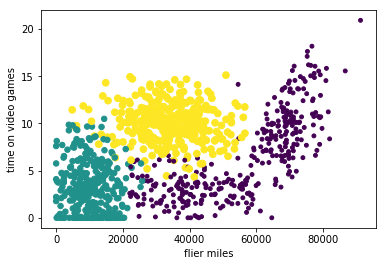

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data[:,0], data[:,1], 15.0*label, 15.0*label) 
plt.xlabel('flier miles') 
plt.ylabel('time on video games') 
plt.show()

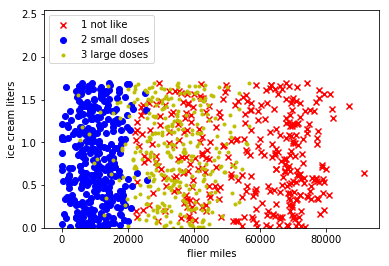

In [10]:
fig = plt.figure()
ax2 = fig.add_subplot(111) 

ax2.scatter(data[np.where(label.ravel()==1),0], data[np.where(label.ravel()==1),2], 
            marker='x', color='r', 
            label ='1 not like') 

ax2.scatter(data[np.where(label.ravel()==2),0], data[np.where(label.ravel()==2),2], 
            marker='o', color='b', 
            label ='2 small doses') 

ax2.scatter(data[np.where(label.ravel()==3),0], data[np.where(label.ravel()==3),2], 
            marker='.', color='y', 
            label='3 large doses') 

# ax2.setet_yticks([0]) 
ax2.set_ylim(0, data[:,2].max()*1.5) 
ax2.set_xlabel('flier miles')
# plt.xlabel('flier miles') 
plt.ylabel('ice cream liters') 
plt.legend(loc = 'upper left')  
plt.show() 

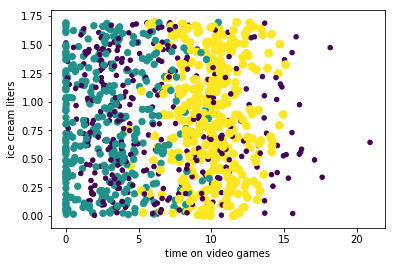

In [11]:
fig = plt.figure()
ax3 = fig.add_subplot(111) 
ax3.scatter(data[:,1], data[:,2], 20.0*label, 20.0*label) 
plt.xlabel('time on video games') 
plt.ylabel('ice cream liters') 
plt.show()
    

In [12]:
def plot_scatter(x, y): 
    
    plt.scatter(x, y, 10.0*label, 10.0*label)
    
#     plt.xlabel('time on video games') 
#     plt.ylabel('ice cream liters') 
    
    plt.show() 
    

## 归一化


In [13]:
#公式：(x-x_min) / (x_max-x_min) 归一化到【0，1】
# 特征值范围不一样，导致他们对结果的影响权重不一致
# 将取值范围统一，归一化到【0，1】 或 【-1，1】之间
def normalize(x):
    x_min = np.min(x, 0) #从列中取最小值
    x_max = np.max(x, 0)
    x_nor = (x - x_min) / (x_max - x_min) 
    
    return x_nor, x_min, x_max 

In [14]:
data_nor, data_min, data_max = normalize(data) 

print(data_nor.shape) 

(1000, 3)


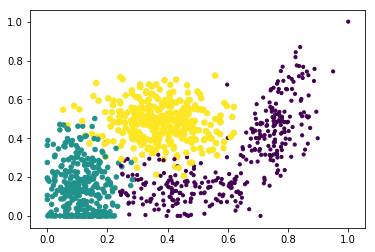

In [15]:
# plot归一化后的散点图
plot_scatter(data_nor[:,0], data_nor[:,1])

## kNN classifier
取10%的数据作为测试数据，因为记录并没有排序规律，所以只需要取前10个即可

In [16]:
# 划分数据集 训练 vs 测试
testRatio = 0.1 # 10%为测试
n_data = data.shape[0] 
n_test = int(testRatio * n_data )
print(n_data, n_test) 

test_data = data_nor[0:n_test, :] 
test_label = label[0:n_test] 
train_data = data_nor[n_test:n_data, :] 
train_label = label[n_test:n_data] 

print('test:', test_data.shape, test_label.shape) 
print('train:', train_data.shape, train_label.shape) 


1000 100
test: (100, 3) (100,)
train: (900, 3) (900,)


In [24]:
def kNN_classfy(test_x, train_x, train_y, k=3, display=False): 
    n_train = train_x.shape[0] 
    n_test = test_x.shape[0] 
    print('train shape: ', train_x.shape)
    print('test shape: ', test_x.shape)


    
    # L2_distcance(): 
    dist = np.zeros((n_test, n_train)) 
        
    for i in range(n_test):
        dist[i] = np.sum(np.square(train_x - test_x[i]), axis=1)
        dist[i] = np.sqrt(dist[i])
    
    # kNN
    pred_test_y = np.zeros(n_test)
    
    for i in range(n_test):
        close_k_y = [] 
#         print('dist[i]:', dist[i]) 
        close_k_y = train_y[np.argsort(dist[i])[:k]] #测试样本与训练集的距离从小到大排序，取前k个最近的标签值
        pred_test_y[i] = np.argmax(np.bincount(close_k_y))  #返回k个数对应标签书目最多的标签，作为测试样本i的标签预测值
        
        if (i%10 == 0) & display: 
            print('no.%d test sample is prediect as %d' % (i, pred_test_y[i]))
    
    return pred_test_y #返回测试样本标签预测列表 注意：返回的是list！

   

In [25]:
pred = kNN_classfy(test_data, train_data, train_label, display=False) #True) 
# print(pred) 

train shape:  (900, 3)
test shape:  (100, 3)


In [26]:
# 准确率
acc = np.mean(pred == test_label) 
print('test accuracy is ', acc) 

test accuracy is  0.95


## Use: Calssfy a new guy
manuually input a new person's information

In [27]:
def pred_newguy():
    result = ['not like', 'like in small doses', 'like in larege doses'] 
    
    # input by the user
    miles_fly = float(input('Flier miles per year: '))
    time_videogame = float(input('Percentage of time spend on video games per year: '))
    liter_icecream = float(input('Liters of ice cream consumed per year: '))
    
    dating_data, dating_label = load_data('MLiAc2_datingSet.txt') 
#     print(type(dating_data), type(dating_labl))

     
    x = np.array([[miles_fly, time_videogame, liter_icecream]]) #注意是[[]]
#     x = np.array([[10, 100000, 0.5]]) 
    
    dating_data, data_min, data_max = normalize(dating_data) 
    x_norm = (x-data_min) / (data_max-data_min) #一定要与train data做一样的归一化处理
    
    pred = kNN_classfy(x_norm, dating_data, dating_label).astype(np.int) #标签1，2，3
#     print('pred = ', pred)
    
    print("You're probably like this person : ", result[pred[0] - 1]) 
    

pred_newguy() 

Flier miles per year: 5
Percentage of time spend on video games per year: 58
Liters of ice cream consumed per year: 1
train shape:  (1000, 3)
test shape:  (1, 3)
You're probably like this person :  not like


# 2-3 MNIST手写数字识别
0-9 10个数字，每个数字大约200个训练样本，文件名_前即为标签

data: MLiAc2_datingSet/train test

train 2000个样本， test 900个

文本格式存储32*32 黑白图像。！文本格式存储图像不能有效利用空间

In [28]:
import numpy as np 
from os import listdir #列出给定目录的文件名

In [29]:
# load data
# input: 32*32 的矩阵
# 想要得到：1*1024 的向量/矩阵
def mat2vec(filename):
    Vector = np.zeros((1, 1024)) 
    f = open(filename) 
    for i in range(32):
        line = f.readline() 
        for j in range(32):
            Vector[0, 32*i+j] = int(line[j]) 
    return Vector  


In [30]:
# train test data
# 标签在文件名里，提取标签
train_label = []
train_filelist = listdir('MLiAc2_mnist_txt/train') #返回该文件夹下所有文件名组成的列表
num_train = len(train_filelist)

# print(train_filelist)
print(num_train) 

1934


In [31]:
#构建一个大矩阵，将所有训练样本集合在里面
train_data = np.zeros((num_train, 1024)) 
train_label = []
for i in range(num_train):
    file = train_filelist[i] 
    filename = file.split('.')[0] #去掉扩展名
    label = int(filename.split('_')[0]) #_前面是标签
    train_label.append(label)
    
    train_data[i,:] = mat2vec('MLiAc2_mnist_txt/train/%s' % file) 

print(train_data[0,:])

[ 0.  0.  0. ...,  0.  0.  0.]


In [45]:
# 处理test data
test_filelist = listdir('MLiAc2_mnist_txt/test') 
num_test = len(test_filelist)

print(num_test)

946


In [38]:
def kNN_classify(x, train, label, k=3): 
    num = train.shape[0] 
      
    # L2_distcance(): 
    dist = np.tile(x, (num, 1)) - train 
    dist = np.sum(np.square(dist), axis=1) 
    dist = np.sqrt(dist)
    
    sorted_index = dist.argsort()
#     print(sorted_index)
    
    class_count = {}
    
    for i in range(k):
        i_label = label[sorted_index[i]]
        class_count[i_label] = class_count.get(i_label, 0) + 1 
    
    sort_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    
#     print(sort_class_count)
       
    return sort_class_count[0][0]

In [47]:
# test
error_count = 0
for i in range(num_test):
    file = test_filelist[i] 
    filename = file.strip('.')[0]
    test_truelabel = filename.strip('_')[0]
    
    test_data = mat2vec('MLiAc2_mnist_txt/test/%s' % file) 
    
    pred = kNN_classify(test_data, train_data, train_label, k=3) 
#     pred_label = pred_result[0] #result 是list
    
    if i%100 == 0:
        print("for No. %d sample, kNN predicted as %s, it's real class is : %s" % 
              (i, pred, test_truelabel)) 
    
    if (int(pred) != int(test_truelabel)):  #注意float int
        error_count += 1 

print("\n error number is ", error_count)
print("\n error rate is ", (error_count/float(num_test))) 

for No. 0 sample, kNN predicted as 0, it's real class is : 0
for No. 100 sample, kNN predicted as 1, it's real class is : 1
for No. 200 sample, kNN predicted as 2, it's real class is : 2
for No. 300 sample, kNN predicted as 3, it's real class is : 3
for No. 400 sample, kNN predicted as 4, it's real class is : 4
for No. 500 sample, kNN predicted as 5, it's real class is : 5
for No. 600 sample, kNN predicted as 6, it's real class is : 6
for No. 700 sample, kNN predicted as 7, it's real class is : 7
for No. 800 sample, kNN predicted as 8, it's real class is : 8
for No. 900 sample, kNN predicted as 9, it's real class is : 9

 error number is  10

 error rate is  0.010570824524312896
